In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import IPL ball by ball dataset

IPLbyb = pd.read_excel('Data/IPLbyb.xlsx')
print(IPLbyb.columns.tolist())

['home team', 'batting_team', 'bowling_team', 'gameno', 'innings_number', 'over_no', 'ball_no', 'runs_total_end', 'delivery_no', 'delno^2', 'runs*wkts', 'wicket', 'wkts_total_end']


Load the data for the IPL ball by ball (IPLbyb) and run the two functions that allow you to plot the game run/wicket curves for each game, and to plot multiple games alongside each other.

Now generate the plots for the pair of games between
- Kings XI Punjab and Delhi Daredevils
- Kolkata Knight Riders and Royal Challengers Bangalore
- Sunrisers and Rajasthan Royals
- Chennai Super Kings and Kolkata Knight Riders

In [4]:
# First, the function for plotting the runs and wickets for each team in a game.
def plot_runs_wickets(IPLbyb, ax):
    gameno = IPLbyb['gameno'].unique()[0]
    for inning, data in IPLbyb.groupby('innings_number'):
        # create separate dataframe for wickets
        wicket = data[data['wicket'] > 0]
        # plots line
        ax.plot(data['delivery_no'],data['runs_total_end'])
        # plots markers
        marker = 'bo' if inning == 1 else 'ro'
        ax.plot(wicket['delivery_no'],wicket['runs_total_end'], marker)
        # labels
        ax.set_xlabel('balls')
        ax.set_ylabel('runs')
        ax.set_title(f'Game {gameno}')
    ax.legend(['runs1','wkt1','runs2','wkt2'])
    
    
def plot_runs_wickets_multi_game(list_games):
    n = len(list_games)
    fig, axs = plt.subplots(n, 1, figsize=(6,15))
    for i, gameno in enumerate(list_games):
        game = IPLbyb[IPLbyb['gameno'] == gameno]
        plot_runs_wickets(game, axs[i] if n > 1 else axs)
        
        
def plot_matches(team_1, team_2):
    game_1 = games[(games["home team"] == team_1) & (games["road team"] == team_2)]
    game_2 = games[(games["home team"] == team_2) & (games["road team"] == team_1)]
    plot_runs_wickets_multi_game([game_1["gameno"].iloc[0], game_2["gameno"].iloc[0]])
        
        
# Identify if the home team batted first

IPLbyb['hometeambatsfirst']= np.where((IPLbyb['home team']==IPLbyb['batting_team']) & (IPLbyb['innings_number']==1),'yes','no')
games = IPLbyb.drop_duplicates('gameno')

games = games[['gameno','home team','batting_team','bowling_team','hometeambatsfirst']]
games['road team'] = games.apply(lambda x: x['batting_team'] if x['home team'] == x['bowling_team'] else x['bowling_team'], axis=1)
assert (games['home team'] != games['road team']).all()
games = games[['gameno','home team','road team','hometeambatsfirst']]
games.head()

,gameno,home team,road team,hometeambatsfirst
0,1,Mumbai Indians,Chennai Super Kings,yes
246,2,Kings XI Punjab,Delhi Daredevils,no
484,3,Kolkata Knight Riders,Royal Challengers Bangalore,no
728,4,Sunrisers,Rajasthan Royals,no
953,5,Chennai Super Kings,Kolkata Knight Riders,no


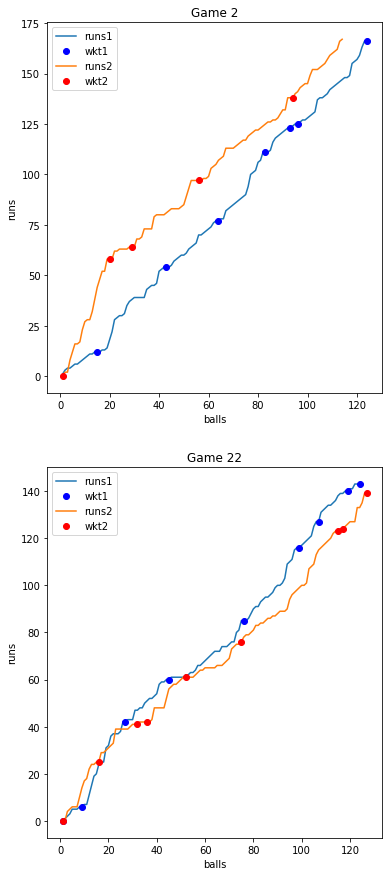

In [5]:
# Kings XI Punjab and Delhi Daredevils
plot_matches("Kings XI Punjab", "Delhi Daredevils")

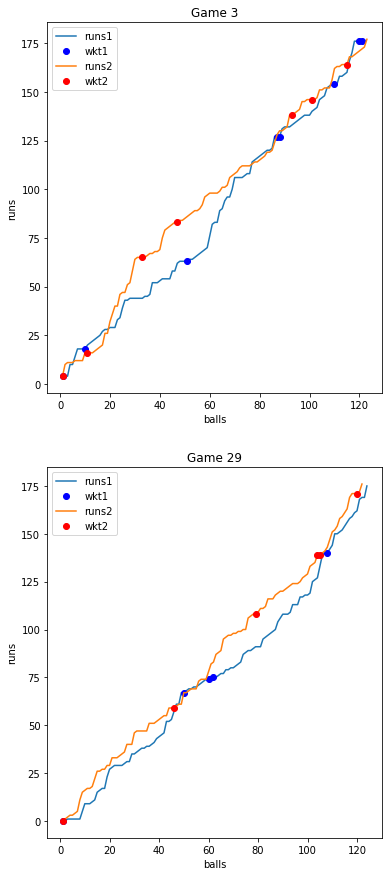

In [6]:
# Kolkata Knight Riders and Royal Challengers Bangalore
plot_matches("Kolkata Knight Riders", "Royal Challengers Bangalore")

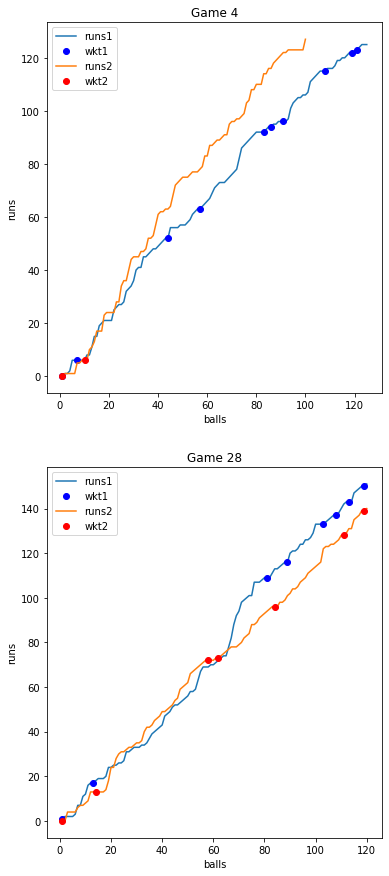

In [8]:
# Sunrisers and Rajasthan Royals
plot_matches("Sunrisers", "Rajasthan Royals")

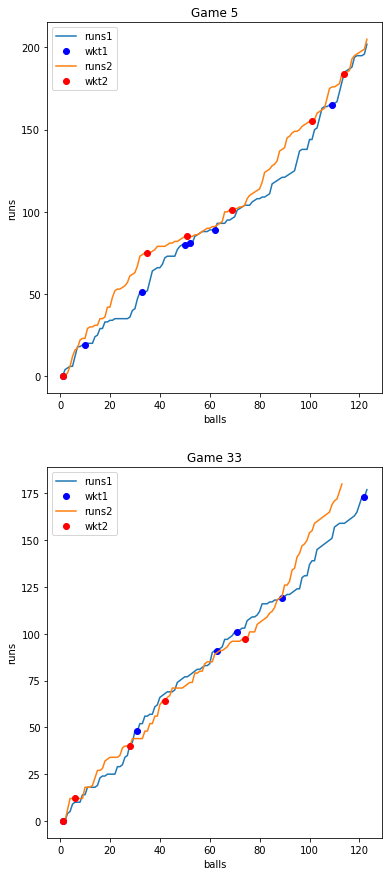

In [9]:
# Chennai Super Kings and Kolkata Knight Riders
plot_matches("Chennai Super Kings", "Kolkata Knight Riders")

In [23]:
# Kings XI Punjab and Delhi Daredevils
IPLbyb[(IPLbyb.gameno == 22) & (IPLbyb.bowling_team == "Delhi Daredevils")]["runs_total_end"]

4942      0
4943      1
4944      2
4945      3
4946      5
       ... 
5061    141
5062    141
5063    143
5064    143
5065    143
Name: runs_total_end, Length: 124, dtype: int64

In [20]:
IPLbyb[(IPLbyb.gameno == 2) & (IPLbyb.bowling_team == "Delhi Daredevils")]["runs_total_end"]

370      0
371      2
372      2
373      8
374     12
      ... 
479    160
480    161
481    162
482    166
483    167
Name: runs_total_end, Length: 114, dtype: int64

In [27]:
for inning, data in IPLbyb[IPLbyb.gameno == 22].groupby('innings_number'):
    print(inning, data)

1              home team     batting_team      bowling_team  gameno  \
4942  Delhi Daredevils  Kings XI Punjab  Delhi Daredevils      22   
4943  Delhi Daredevils  Kings XI Punjab  Delhi Daredevils      22   
4944  Delhi Daredevils  Kings XI Punjab  Delhi Daredevils      22   
4945  Delhi Daredevils  Kings XI Punjab  Delhi Daredevils      22   
4946  Delhi Daredevils  Kings XI Punjab  Delhi Daredevils      22   
...                ...              ...               ...     ...   
5061  Delhi Daredevils  Kings XI Punjab  Delhi Daredevils      22   
5062  Delhi Daredevils  Kings XI Punjab  Delhi Daredevils      22   
5063  Delhi Daredevils  Kings XI Punjab  Delhi Daredevils      22   
5064  Delhi Daredevils  Kings XI Punjab  Delhi Daredevils      22   
5065  Delhi Daredevils  Kings XI Punjab  Delhi Daredevils      22   

      innings_number  over_no  ball_no  runs_total_end  delivery_no  delno^2  \
4942               1        0        1               0            1        1   
4943     